In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\bitcamp\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

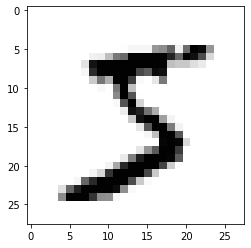

In [5]:
plt.imshow(x_train[0], cmap='Greys')

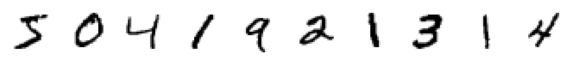

In [6]:
fig, axs =plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train_vec = x_train.reshape(60000, 28*28)
x_test_vec = x_test.reshape(10000, 28*28)

In [10]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [36]:
model = Sequential()
model.add(Dense(112, input_dim= 28*28, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 112)               87920     
                                                                 
 dense_9 (Dense)             (None, 56)                6328      
                                                                 
 dense_10 (Dense)            (None, 28)                1596      
                                                                 
 dense_11 (Dense)            (None, 10)                290       
                                                                 
Total params: 96,134
Trainable params: 96,134
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
hist = model.fit(x_train_vec, y_train_oh, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 18s 4ms/step - loss: 1.2702 - accuracy: 0.6798 - val_loss: 0.5521 - val_accuracy: 0.8533
Epoch 2/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.3392 - accuracy: 0.9079 - val_loss: 0.2325 - val_accuracy: 0.9331
Epoch 3/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.2049 - accuracy: 0.9439 - val_loss: 0.1704 - val_accuracy: 0.9557
Epoch 4/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1632 - accuracy: 0.9561 - val_loss: 0.1729 - val_accuracy: 0.9574
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1426 - accuracy: 0.9621 - val_loss: 0.1761 - val_accuracy: 0.9512
Epoch 6/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1303 - accuracy: 0.9660 - val_loss: 0.1477 - val_accuracy: 0.9658
Epoch 7/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1137 - accuracy: 0.9702 - val_loss: 0.1691 - val_ac

In [39]:
model.evaluate(x_test_vec, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.1797 - accuracy: 0.9646


[0.17972493171691895, 0.9646000266075134]

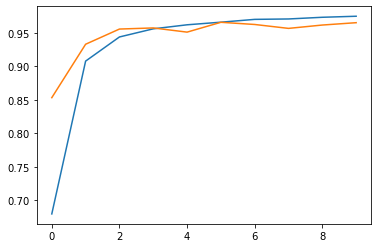

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

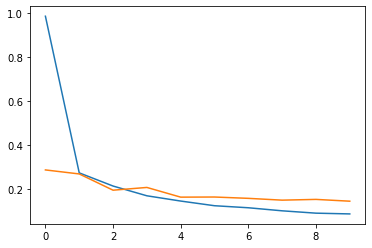

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [12]:
# CNN

In [17]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [18]:
x_train_cov = x_train.reshape(60000, 28, 28, 1) # data num, row num, col num, depth
x_test_cov = x_test.reshape(10000, 28, 28, 1)

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               1179776   
                                                      

In [49]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [50]:
model.fit(x_test_cov, y_test_oh, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 4s 5ms/step - loss: 0.9324 - accuracy: 0.8749 - val_loss: 0.1190 - val_accuracy: 0.9635
Epoch 2/20
800/800 [==============================] - 4s 5ms/step - loss: 0.1801 - accuracy: 0.9490 - val_loss: 0.1243 - val_accuracy: 0.9610
Epoch 3/20
800/800 [==============================] - 4s 5ms/step - loss: 0.1242 - accuracy: 0.9617 - val_loss: 0.1437 - val_accuracy: 0.9615
Epoch 4/20
800/800 [==============================] - 4s 5ms/step - loss: 0.0951 - accuracy: 0.9699 - val_loss: 0.1174 - val_accuracy: 0.9685
Epoch 5/20
800/800 [==============================] - 4s 5ms/step - loss: 0.0872 - accuracy: 0.9735 - val_loss: 0.1241 - val_accuracy: 0.9715
Epoch 6/20
800/800 [==============================] - 4s 5ms/step - loss: 0.0835 - accuracy: 0.9760 - val_loss: 0.1248 - val_accuracy: 0.9735
Epoch 7/20
800/800 [==============================] - 4s 5ms/step - loss: 0.0575 - accuracy: 0.9809 - val_loss: 0.1688 - val_accuracy: 0.9685
Epoch 

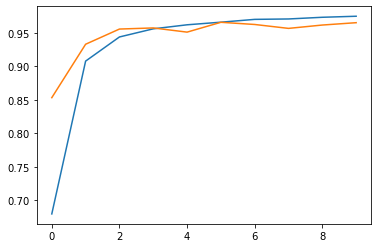

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

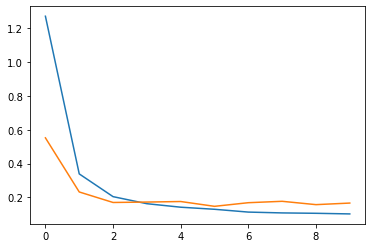

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [26]:
model.predict(x_test_cov,y_test_oh)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()